In [15]:
import pandas as pd 
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk import pos_tag
import pandas as pd
import math
import numpy as np
import re
import numpy as np
import nltk.corpus
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.lancaster import LancasterStemmer
from numpy.linalg import norm
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import plotly_express as px
import seaborn as sns
import matplotlib.pyplot as plt


In [32]:
VOCAB = pd.read_csv("VOCAB.csv").set_index("term_str")
LIB = pd.read_csv("LIB.csv").set_index('speech_id')
CORPUS = pd.read_csv('CORPUS.csv').set_index('speech_id')

## RIFF 1

In [33]:
key_words = ['freedom', 'economy', 'war', 'health', 'education']

In [39]:
CORPUS = CORPUS[CORPUS.term_str.isin(key_words)]

In [51]:
term_counts = CORPUS.groupby(['speech_id', 'term_str']).size()

term_counts_df = term_counts.reset_index(name='count')

In [52]:
term_counts_df

,speech_id,term_str,count
0,0,health,1
1,1,war,1
2,2,war,1
3,3,war,3
4,4,war,3
...,...,...,...
2198,989,economy,2
2199,989,freedom,7
2200,989,war,2
2201,990,economy,6


In [53]:
term_counts_df = term_counts_df.join(LIB['Date'], on='speech_id')

In [54]:
term_counts_df['Date'] = pd.to_datetime(term_counts_df['Date'])

term_counts_df['Year'] = term_counts_df['Date'].dt.year

In [55]:
term_counts_df['Decade'] = (term_counts_df['Year'] // 10) * 10

term_counts_df

,speech_id,term_str,count,Date,Year,Decade
0,0,health,1,1789-04-30,1789.0,1780.0
1,1,war,1,1789-10-03,1789.0,1780.0
2,2,war,1,1790-01-08,1790.0,1790.0
3,3,war,3,1790-12-08,1790.0,1790.0
4,4,war,3,1790-12-29,1790.0,1790.0
...,...,...,...,...,...,...
2198,989,economy,2,2019-02-15,2019.0,2010.0
2199,989,freedom,7,2019-02-15,2019.0,2010.0
2200,989,war,2,2019-02-15,2019.0,2010.0
2201,990,economy,6,2019-09-24,2019.0,2010.0


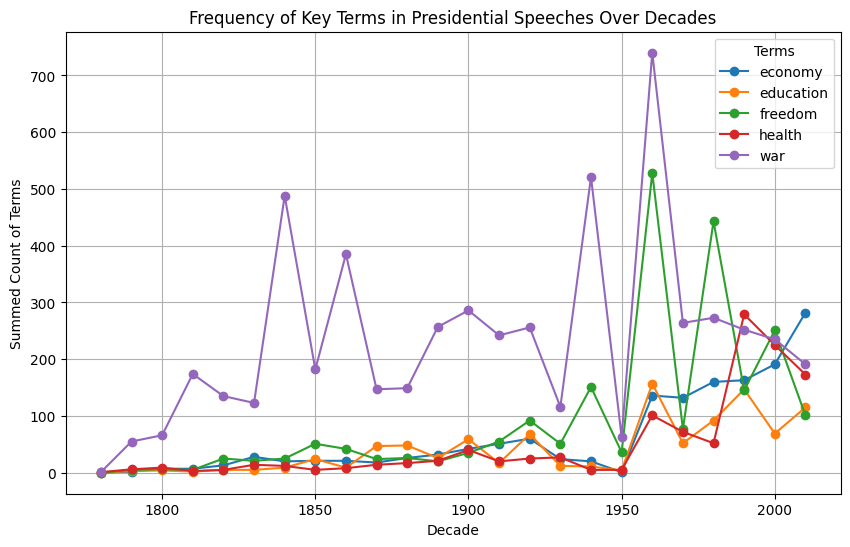

In [56]:
term_counts_later = term_counts_df.groupby(['Decade', 'term_str']).agg({'count': 'sum'}).reset_index()

term_counts_pivot = term_counts_later.pivot(index='Decade', columns='term_str', values='count').fillna(0)

term_counts_pivot.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Frequency of Key Terms in Presidential Speeches Over Decades')
plt.xlabel('Decade')
plt.ylabel('Summed Count of Terms')
plt.grid(True)
plt.legend(title='Terms')
plt.show()

## RIFF 2

In [57]:
B = pd.read_csv('BOW_SENT.csv')

In [60]:
B = B.join(LIB['President'], on='speech_id')


In [61]:
B

,speech_id,term_str,n,tfidf,max_pos,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,sentiment,President
0,0,accomplished,1,0.017435,VBN,0.000000,0.000000,0.0,0.000000,0.017435,0.000000,0.000000,0.000000,0.017435,George Washington
1,0,adore,1,0.067972,RB,0.000000,0.067972,0.0,0.000000,0.067972,0.000000,0.000000,0.067972,0.067972,George Washington
2,0,appreciation,1,0.029176,NN,0.000000,0.000000,0.0,0.000000,0.029176,0.000000,0.000000,0.029176,0.029176,George Washington
3,0,ardent,1,0.041952,JJ,0.000000,0.041952,0.0,0.000000,0.041952,0.000000,0.000000,0.000000,0.041952,George Washington
4,0,asylum,1,0.043978,NN,0.000000,0.000000,0.0,0.043978,0.000000,0.000000,0.000000,0.000000,-0.043978,George Washington
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128751,990,word,3,0.030211,NN,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.030211,0.030211,Donald Trump
128752,990,words,3,0.019291,NNS,0.019291,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,-0.019291,Donald Trump
128753,990,worried,1,0.023574,JJ,0.000000,0.000000,0.0,0.000000,0.000000,0.023574,0.000000,0.000000,-0.023574,Donald Trump
128754,990,worse,2,0.026429,JJR,0.000000,0.000000,0.0,0.026429,0.000000,0.026429,0.000000,0.000000,-0.026429,Donald Trump


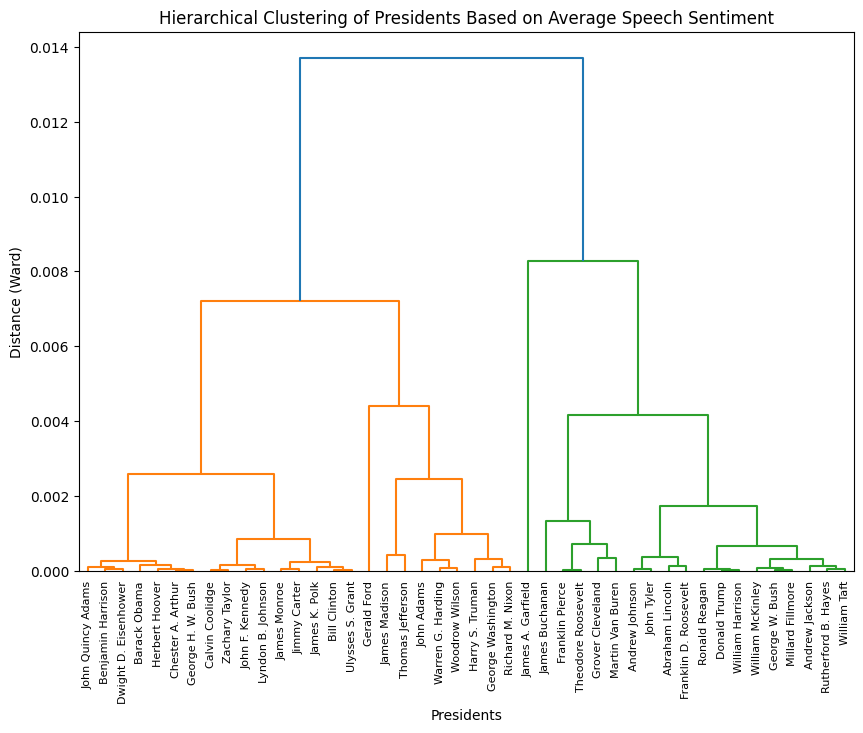

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage



president_sentiments = B.groupby('President')['sentiment'].mean().reset_index()

feature_matrix = president_sentiments.set_index('President')
distance_matrix = pdist(feature_matrix, 'euclidean')  # Compute the pairwise distances between presidents
linkage_matrix = linkage(distance_matrix, 'ward')  # Perform hierarchical clustering

plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, labels=feature_matrix.index.tolist(), leaf_rotation=90)
plt.title('Hierarchical Clustering of Presidents Based on Average Speech Sentiment')
plt.xlabel('Presidents')
plt.ylabel('Distance (Ward)')
plt.show()

## RIFF 3

In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd

In [74]:
THETA=pd.read_csv('THETA.csv')

In [75]:
t= THETA.groupby('speech_id').mean().reset_index()

In [76]:
t

,speech_id,sent_num,T00,T01,T02,T03,T04,T05,T06,T07,...,T30,T31,T32,T33,T34,T35,T36,T37,T38,T39
0,0,11.173913,0.015004,0.037588,0.013489,0.018498,0.016827,0.011536,0.017547,0.063020,...,0.030448,0.026484,0.003887,0.024646,0.018379,0.037280,0.010237,0.019907,0.027724,0.003887
1,1,1.500000,0.012295,0.083527,0.053604,0.001796,0.001796,0.001796,0.033046,0.062769,...,0.053542,0.013823,0.012225,0.021027,0.012669,0.043446,0.001796,0.014393,0.001796,0.001796
2,2,10.000000,0.026737,0.016156,0.020536,0.004386,0.006592,0.032774,0.014852,0.089319,...,0.077389,0.035827,0.004386,0.004386,0.010620,0.018647,0.013910,0.020043,0.004386,0.015517
3,3,19.500000,0.010724,0.042031,0.004653,0.018027,0.022336,0.022983,0.020069,0.109770,...,0.035411,0.015425,0.030862,0.016680,0.010711,0.018855,0.016341,0.045739,0.014444,0.019354
4,4,24.061224,0.038292,0.036688,0.022571,0.017153,0.006585,0.018742,0.009136,0.012915,...,0.020190,0.023106,0.013388,0.020499,0.047079,0.006585,0.020190,0.024512,0.010003,0.006585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,986,43.986842,0.013535,0.019770,0.022657,0.012747,0.031497,0.025986,0.042305,0.046982,...,0.022521,0.017700,0.011467,0.010977,0.017775,0.030620,0.034593,0.010185,0.035347,0.011418
987,987,138.150376,0.026742,0.026754,0.027615,0.023521,0.024310,0.013041,0.064245,0.017958,...,0.019586,0.029147,0.024730,0.018339,0.018385,0.027526,0.025727,0.020356,0.055037,0.018793
988,988,385.441901,0.020836,0.034520,0.049276,0.023167,0.033152,0.022853,0.024880,0.030974,...,0.020657,0.024626,0.019574,0.053414,0.029469,0.016287,0.036812,0.020613,0.021170,0.018723
989,989,108.385714,0.023110,0.013060,0.042171,0.012067,0.020613,0.011501,0.034866,0.019198,...,0.017959,0.010792,0.015639,0.022038,0.017954,0.023289,0.037813,0.025538,0.045741,0.023601


In [77]:
THETA = t.join(LIB['President'])

In [82]:
president_codes, unique_presidents = pd.factorize(THETA['President'])

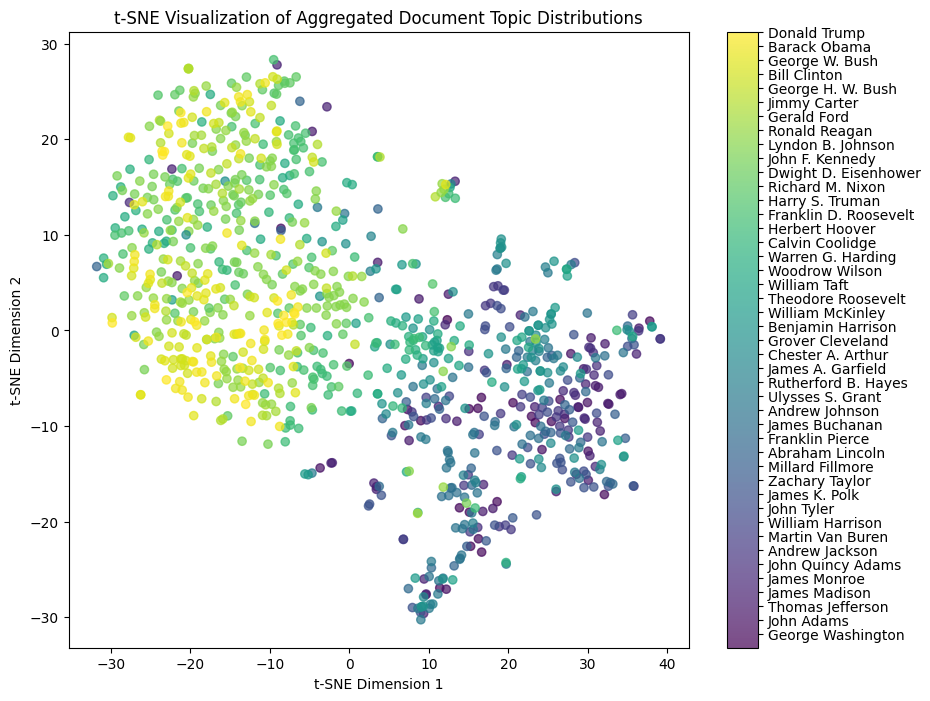

In [83]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

topic_columns = [col for col in THETA.columns if col.startswith('T')]
topic_data = THETA[topic_columns]

tsne_model = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
tsne_results = tsne_model.fit_transform(topic_data)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=president_codes, cmap='viridis', alpha=0.7)
colorbar = plt.colorbar(scatter)
colorbar.set_ticks(np.arange(len(unique_presidents)))
colorbar.set_ticklabels(unique_presidents)
plt.title('t-SNE Visualization of Aggregated Document Topic Distributions')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()